In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Supercomputação - Projeto 1 (Entrega 1) - Rafael Vieira Rosenzvaig
## O Problema

###### Este projeto tem como objetivo resolver o problema de escolha de projetos finais de engenharia dos alunos do Insper, utilizando técnicas de computação paralela.


###### Solução:
A solução encontrada foi a mais intutiva possível. A função escolhe_alunos() recebe a lista de preferências de cada aluno como entrada e recursivamente calcula a satisfação geral com todas as combinações possíveis. A combinação que possuir satisfação geral melhor será a escolhida e retornada pela função.

## Infraestrutura
##### Executáveis:
- ingenua
- backtrack.py
- cria_entrada.py

##### Arquivos:
- backtrack.py
    - Este arquivo define as funções: 
        - escolhe_alunos(), é a função que recursivamente calcula qual a melhor combinação possível entre a distribuição dos alunos, baseada na preferência de cada um.
        - main(), lê os parâmetros do arquivo de entrada e chama a função escolhe_alunos() com esses parâmetros.
- ingenua.cpp
    - Este arquivo é a tradução direta para C++ do arquivo backtrack.py, portanto as funções fazem as mesmas coisas.
- cria_entrada.py
    - Este arquivo cria uma entrada para o arquivo backtrack.py e/ou ingenua.cpp e dentro dela são definidos os parâmetros de número de alunos, número de projetos e número de escolhas que cada aluno pode fazer para ranquear sua preferência.
- CMakeLists.txt
    - Este arquivo contém os parâmetros de compilação para gerar o executável.
           
##### Compilando e executando
Para compilar o programa digite o seguinte código na pasta do projeto:
Primeiro ```cmake ./build``` para usuários de Linux ou ```cmake -D CMAKE_CXX_COMPILER=g++-9 -B ./build``` para usuários de Mac  e depois ```make -C ./build```.  
Para executar o programa digite o seguinte código na pasta do projeto:
``` build/ingenua < entradaX ``` onde X é o número da entrada desejada.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import sys, string, os, subprocess
import time

start_time = time.time()
out1_py = subprocess.check_output("python3 backtrack.py < entrada1", shell=True)
time1_py = (time.time() - start_time)

start_time = time.time()
out1_cpp = subprocess.check_output("build/ingenua < entrada1", shell=True)
time1_cpp = (time.time() - start_time)

In [2]:
start_time = time.time()
out2_py = subprocess.check_output("python3 backtrack.py < entrada2", shell=True)
time2_py = (time.time() - start_time)

start_time = time.time()
out2_cpp = subprocess.check_output("build/ingenua < entrada2", shell=True)
time2_cpp = (time.time() - start_time)

In [3]:
start_time = time.time()
out3_py = subprocess.check_output("python3 backtrack.py < entrada3", shell=True)
time3_py = (time.time() - start_time)

start_time = time.time()
out3_cpp = subprocess.check_output("build/ingenua < entrada3", shell=True)
time3_cpp = (time.time() - start_time)

In [4]:
print("Resultados brutos:")
print("Python entrada1 " + str(time1_py) + " segundos")
print("C++ entrada1 " + str(time1_cpp) + " segundos")
print("Python entrada2 " + str(time2_py) + " segundos")
print("C++ entrada2 " + str(time2_cpp) + " segundos")
print("Python entrada3 " + str(time3_py) + " segundos")
print("C++ entrada3 " + str(time3_cpp) + " segundos")


Resultados brutos:
Python entrada1 0.18460702896118164 segundos
C++ entrada1 0.584932804107666 segundos
Python entrada2 0.24082612991333008 segundos
C++ entrada2 0.034356117248535156 segundos
Python entrada3 12.67642617225647 segundos
C++ entrada3 5.193982839584351 segundos


## Resultados
Observando os resultados é possível afirmar que a mudança de python para C++ proporcionou uma melhora substancial na velocidade em quando os tamanhos de entradas fornecidas eram maiores, onde se viu uma melhora de quase 2 vezes para a entrada3 e de aproximadamente 7 vezes para a entrada2. Já a entrada1 apresentou um tempo de processamento melhor em quase 6 vezes para o python.


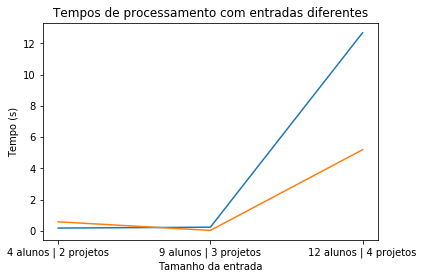

In [5]:
tempos_py = [time1_py, time2_py, time3_py]
tempos_cpp = [time1_cpp, time2_cpp, time3_cpp]
entradas = ["4 alunos | 2 projetos", "9 alunos | 3 projetos" , "12 alunos | 4 projetos"]
plt.plot(entradas,tempos_py,label="Python")
plt.plot(entradas,tempos_cpp,label="C++")
plt.title('Tempos de processamento com entradas diferentes')
plt.ylabel('Tempo (s)')
plt.xlabel('Tamanho da entrada')
plt.show()

## Considerações finais
